<a href="https://colab.research.google.com/github/mcalmeida13/100pageMLBook/blob/main/100PageML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 4

##Gradient Descent

Main goal is to learn gradient descent using a one-feature dataset. We want to find the line which best fits the data. In order to do this, we need to find the optimal parameters $w$ and $b$

\begin{equation}
f(x) = wx +b
\end{equation}

$\alpha$ is the learning rate

```
dl_dw = $\frac{\partial l}{\partial w}$
```
```
dl_db = $\frac{\partial l}{\partial b}$
```
$l$ is the loss function, given by

\begin{equation}
l = \frac{1}{N}\sum_{i=1}ˆN (y_i - (wx_i + b))ˆ2
\end{equation}

Since the derivative is

\begin{equation}
\frac{\partial l}{\partial w} = \frac{1}{N}\sum_{i=1}ˆN -2x_i(y_i - (wx_i + b))
\end{equation}

\begin{equation}
\frac{\partial l}{\partial b} = \frac{1}{N}\sum_{i=1}ˆN -2(y_i - (wx_i + b))
\end{equation}

in Python perspective, $y_i$ and $x_i$ are arrays.


We must update $w$ and $b$
\begin{equation}
w' = w - \alpha\frac{\partial l}{\partial w}
\end{equation}

\begin{equation}
b' = b - \alpha\frac{\partial l}{\partial b}
\end{equation}

or in code

```
w' = w - alpha*dl_dw

b' = b - alpha*dl_db
```

So we can create a function which update these values



In [49]:
def update_w_and_b(x,y, w, b, alpha):
  dl_dw = 0.0 #Starting condition for the derivative
  dl_db = 0.0
  N = len(x) #Size of summation

  #Computing the summation
  for i in range(N):
    dl_dw += -2*x[i]*(y[i] - (w*x[i] + b)) #derivative of loss function with respect w
    dl_db += -2*(y[i] - (w*x[i] + b)) #derivative of loss function with respect b
  
  #correction of the parameters

  w = w - (1/float(N))*alpha*dl_dw
  b = b - (1/float(N))*alpha*dl_db

  return w,b

One iteration is not good enough because we are guessing our start, we could be far from the minimum. At minimum, the derivatives are zero. Each iteration is called epoch. For each epoch we are going to do the following steps



1.   update $w$ and $b$
2.   calculate the average loss



In [50]:
#average loss function

def avg_loss(x,y,w,b):
  N = len(x)
  total_error = 0.0
  for i in range(N):
    total_error += (y[i] - (w*x[i]+b))**2 #loss function
  return total_error/float(N)
  

In [51]:
def train(x,y,w,b,alpha,epochs):
  for e in range(epochs):
    w,b = update_w_and_b(x,y,w,b,alpha)

    #show the process for epochs multiple of 400
    if e%400 == 0:
      print("epoch", e, "loss: ", avg_loss(x,y,w,b))
  
  return w,b

Let's try

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


url = 'https://raw.githubusercontent.com/mcalmeida13/100pageMLBook/main/Advertising.csv'
data = pd.read_csv(url)

data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [45]:
data = shuffle(data)

In [46]:
x = data['radio']
y = data['sales']

In [38]:
len(x)

200

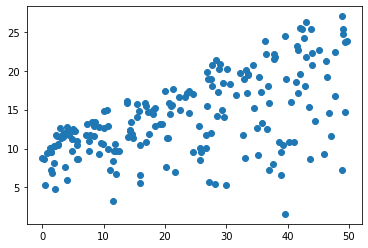

In [47]:
plt.scatter(x,y)

learning rate = 0.001
epochs = 15000

starting $w=0$, $b=0$

In [53]:
w,b = train(x,y,0,0,0.001,15000)

epoch 0 loss:  92.32078294903626
epoch 400 loss:  33.79131790081576
epoch 800 loss:  27.9918542960729
epoch 1200 loss:  24.33481690722147
epoch 1600 loss:  22.028754937538633
epoch 2000 loss:  20.57459375662496
epoch 2400 loss:  19.657625883308423
epoch 2800 loss:  19.07940244306619
epoch 3200 loss:  18.71478514667572
epoch 3600 loss:  18.48486404079425
epoch 4000 loss:  18.33987992881413
epoch 4400 loss:  18.248455556762373
epoch 4800 loss:  18.19080499291156
epoch 5200 loss:  18.154451584758743
epoch 5600 loss:  18.131527779750563
epoch 6000 loss:  18.117072440822145
epoch 6400 loss:  18.1079571642151
epoch 6800 loss:  18.102209234814435
epoch 7200 loss:  18.098584693967343
epoch 7600 loss:  18.096299123732113
epoch 8000 loss:  18.094857884270205
epoch 8400 loss:  18.093949064600373
epoch 8800 loss:  18.09337597927063
epoch 9200 loss:  18.093014601974247
epoch 9600 loss:  18.092786723954067
epoch 10000 loss:  18.09264302817517
epoch 10400 loss:  18.09255241620278
epoch 10800 loss:  1

In [55]:
def predict(x,w,b):
  return w*x + b

In [57]:
x_test = 23.0
y_pred = predict(x_test,w,b)
y_pred

13.968556878212048